# Dataset Information


Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not.

## import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('train_loan.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing dataset

In [6]:
# filling the missing values with numerical term - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [7]:
df['Gender'].mode()[0]

'Male'

In [8]:
# filling the missing values with categorical terms - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data analysis

In [17]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [19]:
list(enumerate(cat_cols))

[(0, 'Gender'),
 (1, 'Married'),
 (2, 'Dependents'),
 (3, 'Education'),
 (4, 'Self_Employed'),
 (5, 'Property_Area')]

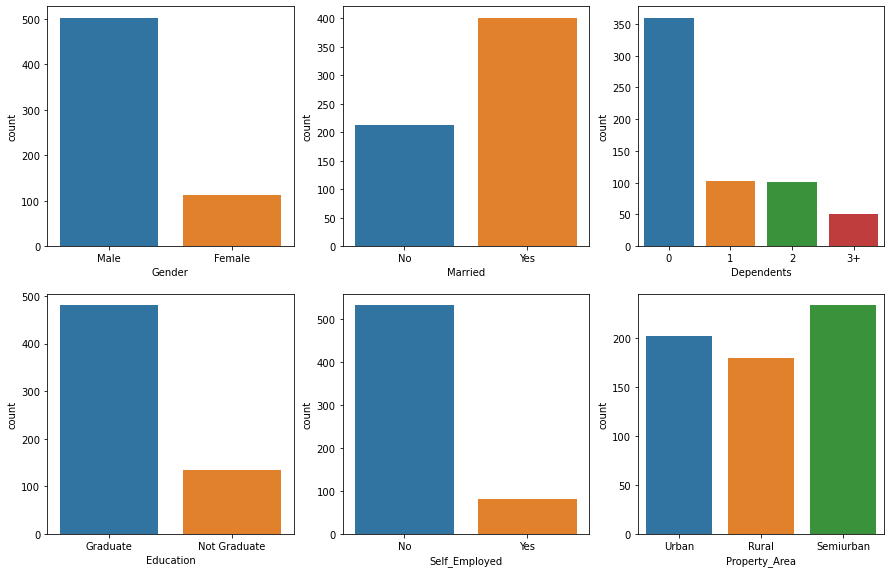

In [20]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize =(15,15))
for i in enumerate(cat_cols):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(i[1], data= df)
    #plt.xticks(rotation = 45)

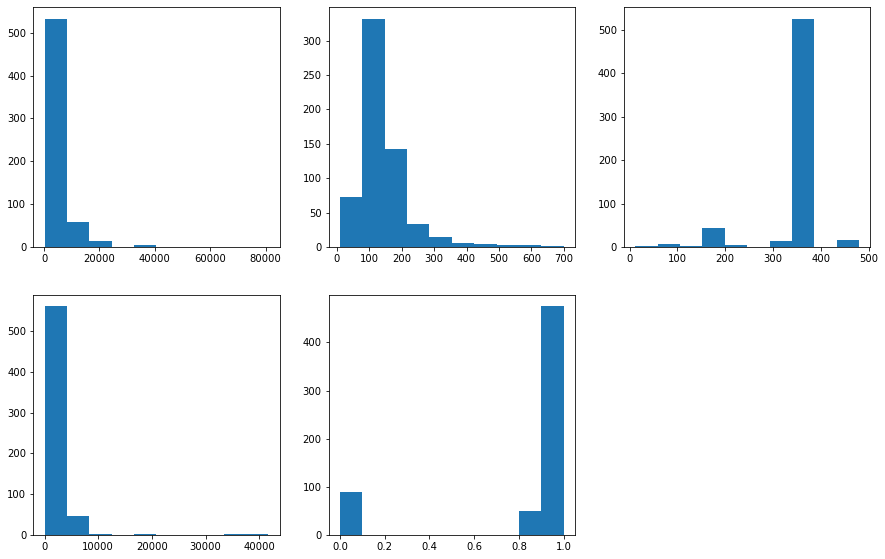

In [21]:
num_cols = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncome', 'Credit_History']
plt.figure(figsize =(15,15))
for i in enumerate(num_cols):
    plt.subplot(3, 3, i[0]+1)
    plt.hist(i[1], data = df)

In [22]:
df_num_cols = df.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize =(15,15))                      
ax = plt.subplots(nrows= 2, ncols=3)
index=0
ax = ax.flatten()
                      
for col in df_num_cols.columns:
    sns.distplot(num_cols[col], ax= ax[index])
    index+=1
                      
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

SyntaxError: invalid syntax (<ipython-input-22-0edf8006f603>, line 2)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

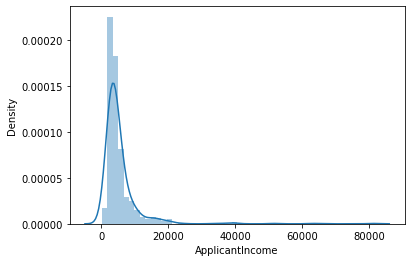

In [23]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

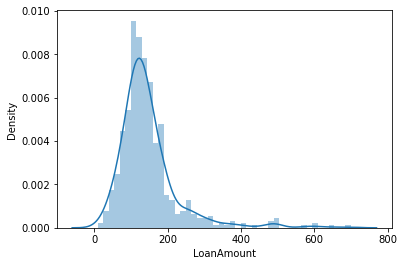

In [24]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

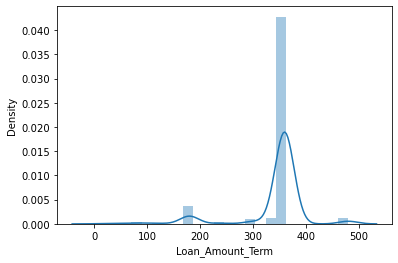

In [25]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

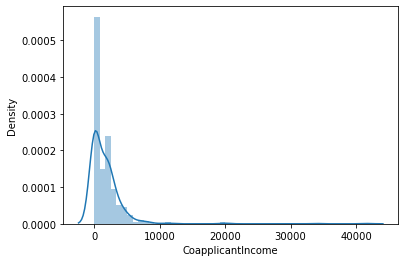

In [26]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

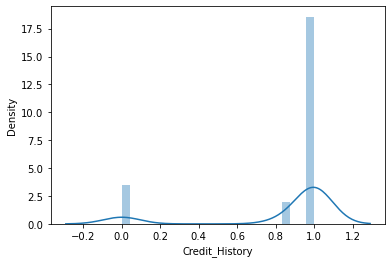

In [27]:
sns.distplot(df['Credit_History'])

## creation of new attributes


In [28]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

# best practice isto apply normalisation before creating new attributes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

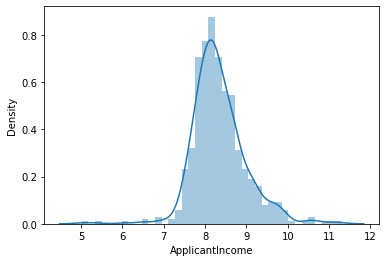

In [29]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

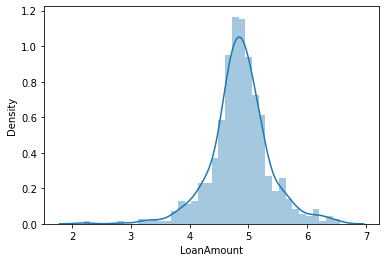

In [30]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

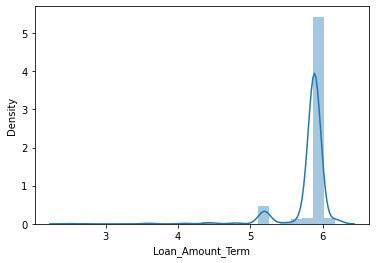

In [32]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

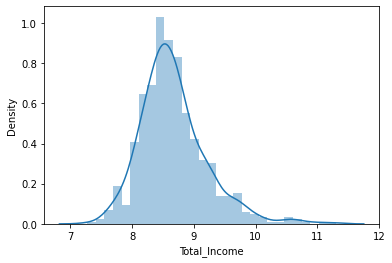

In [33]:
df['Total_Income'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income'])

## Coorelation matrix

<AxesSubplot:>

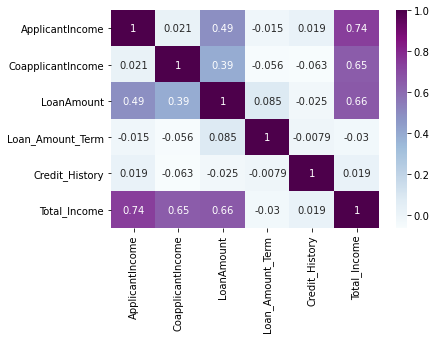

In [34]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="BuPu")

In [35]:
df = df.drop(columns = ['CoapplicantIncome', 'Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,8.674026,4.986426,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,8.430109,4.852030,5.886104,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,7.856707,4.787492,5.886104,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,8.699515,4.948760,5.886104,1.0,Urban,Y,8.699515


## Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df[col]= le.fit_transform(df[col])

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1,8.699515


## Train Test split

In [38]:
X = df.drop(columns=['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

## Model Training

In [40]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("cross validation is ", np.mean(score)*100)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
cross validation is  80.9462881514061


In [42]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
cross validation is  77.85285885645742


## Hyperparameter tuning

In [43]:
model  = RandomForestClassifier(n_estimators = 100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
cross validation is  80.29454884712781


## Confusion Matrix

In [44]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[26, 28],
       [ 4, 96]], dtype=int64)

<AxesSubplot:>

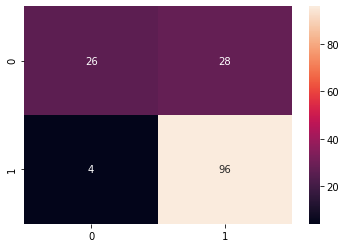

In [46]:
sns.heatmap(cm, annot=True)